Imported useful libraries and loaded data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

X_train = np.array([
                    [0.346, 0.780],
                    [0.303, 0.439],
                    [0.358, 0.729],
                    [0.602, 0.863],
                    [0.790, 0.753],
                    [0.611, 0.965],
                    ])
y_train = np.array([0, 0, 0, 1, 1, 1])

X_test = np.array([
                   [0.959, 0.382],
                   [0.750, 0.306],
                   [0.395, 0.760],
                   [0.823, 0.764],
                   [0.761, 0.874],
                   [0.844, 0.435]
                  ])
y_test = np.array([0, 0, 0, 1, 1, 1])

Checking In built regression model

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test),y_test))
clf

0.8333333333333334


LogisticRegression(random_state=0)

In [11]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

X_train = X_train.T
y_train = y_train.reshape(1,X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1,X_test.shape[1])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2, 6)
(1, 6)
(2, 6)
(1, 6)


Logistic Regression class developed on own

In [12]:
class logisticRegression:
    # constructor
    def __init__(self,convergence=False):
        self.alpha = 0.1
        self.costList = []
        self.maxIterations = 5000 if not convergence else 5*1e5
        self.weights = []
        self.bias = 0.00
        self.part2_w = None
        self.part2_b = None

    # sigmoid function
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    # cost function
    def costFunction(self,size,y,sigmValue):
        median = np.median(sigmValue[sigmValue > 0])
        sigmValue[sigmValue == 0] = (1-median)
        sigmValue[sigmValue == 1] = median
        return (-1/size)*np.sum(y*np.log(sigmValue) + (1-y)*np.log(1-sigmValue))
    
    # gradient descent
    def gradientDescent(self,size,m1,m2):
        dW = (1/size)*np.dot(m1,m2)
        dB = (1/size)*np.sum(m1)
        return dW,dB
    
    # developed the method but not used anywhere
    # helpful for finding out the convergence
    def considerableError(self,Wprime,W):
        res = Wprime-W
        res = [element*element for element in res]
        return np.sum(res) < 1e-20
    
    # fit method
    def fit(self,X,y,W,B):
        size = X.shape[1]
        n = X.shape[0]
        iterations = 1
        self.weights = W
        self.bias = B
        
        while True:
            sigmZ = np.dot(W.T,X) + B 
            sigmValue = self.sigmoid(sigmZ)
            cost = self.costFunction(size,y,sigmValue)
            self.costList.append(cost)

            dW,dB = self.gradientDescent(size,sigmValue-y,X.T)

            W -= self.alpha*dW.T
            B -= self.alpha*dB

            if iterations >= self.maxIterations:
              break

            if iterations == 1:
              self.part2_w = W.copy()
              self.part2_b = B

            iterations += 1
        
        self.weights = W
        self.bias = B
        return self.costList

    # predict method
    def predict(self,X_test,y_test,status=False):
        z = np.dot(self.weights.T,X_test) + self.bias
        a = self.sigmoid(z)
        a = a>=0.5
        a = np.array(a,dtype='int64')
        y_test = np.array(y_test,dtype='int64')

        acc = (1 - np.sum(np.absolute(a - y_test))/y_test.shape[1])*100
        print("Accuracy of the model is : ", round(acc, 10), "%")

        if status:
          print("precision = ",precision_score(a,y_test,average='weighted',zero_division=0))
          print("recall score = ",recall_score(y_test,a,average='weighted',zero_division=0))


Accuracy of the model is :  66.6666666667 %


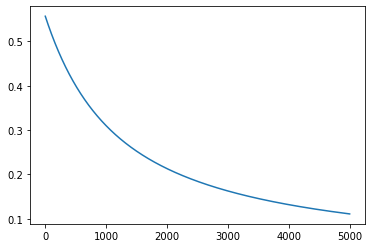

In [13]:
W = np.array([[1.5],[0.5]])

model = logisticRegression()
costList = model.fit(X_train,y_train,W,-1)
plt.plot(np.arange(len(costList)),costList)
model.predict(X_test,y_test)

5 - B - Part B

In [14]:
print("After One iteration ")
print("W = ",model.part2_w)
print("B = ",model.part2_b)

After One iteration 
W =  [[1.50535086]
 [0.50196867]]
B =  -1.0031662597725644


5 - B - Part C

Accuracy of the model is :  66.6666666667 %
precision =  0.6
recall score =  1.0
Final Weights :  [[42.85263545]
 [ 9.55973708]]
Final Bias :  -28.346038607109172


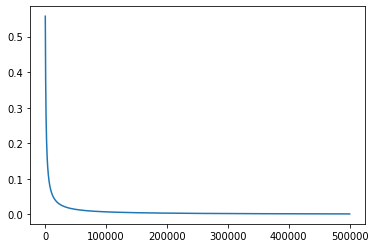

In [15]:
W = np.array([[1.5],[0.5]])

model = logisticRegression(True)
costList = model.fit(X_train,y_train,W,-1)
plt.plot(np.arange(len(costList)),costList)
model.predict(X_test,y_test,True)
print("Final Weights : ",model.weights)
print("Final Bias : ",model.bias)